# Importing Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, f1_score, roc_curve,auc
from sklearn.decomposition import PCA

# Importing Dataset

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Encoding Categorical Values

In [4]:
categorical_column = ['Attrition', 'BusinessTravel', 'Department','Gender', 'JobRole', 'MaritalStatus', 'OverTime','EducationField']
encoder=LabelEncoder()
df[categorical_column]=df[categorical_column].apply(encoder.fit_transform)

# Seperating into X and y

In [5]:
y=df['Attrition']
X=df.drop(['EmployeeCount','Attrition','EmployeeNumber','Over18','StandardHours'],axis=1)

In [6]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42,replacement=True)
X_, Y1 = rus.fit_resample(X,y)
X1 = pd.DataFrame(X_,columns=X.columns)

ros = RandomOverSampler(random_state=42)
X_, Y2 = ros.fit_resample(X,y)
X2 = pd.DataFrame(X_,columns=X.columns)

# UnderSampling

In [7]:
X=X1
y=Y1

# Spliting into Train and Test Sets

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Feature Scaling

####PCA

20 PCs explain  [70.74068688 99.76281581] % of variance cumulatively


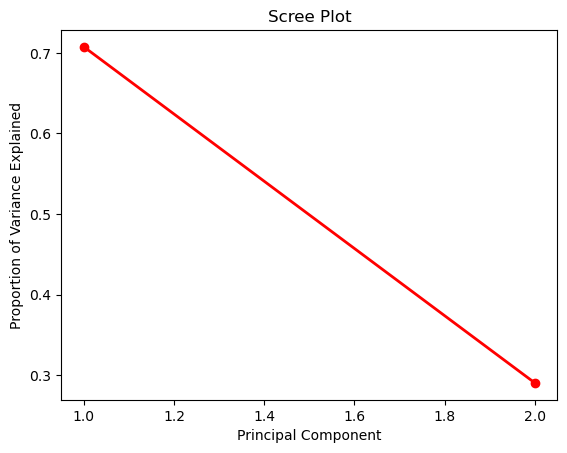

In [9]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
print('20 PCs explain ', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Standardization

20 PCs explain  [17.44555167 24.44074193 30.65901903 36.38446522 41.40488981 46.19338821
 50.24580214 54.14136646 57.92204534 61.55864087 65.17124382 68.54778693
 71.79236823 74.88825386 77.83767848 80.70137862 83.37833712 85.93647278
 88.25925916 90.54980649] % of variance cumulatively


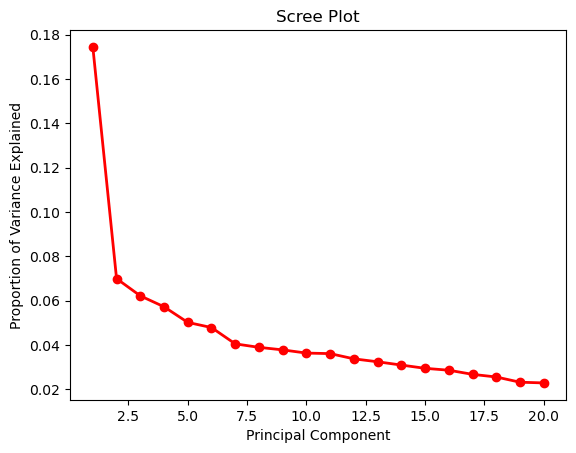

In [10]:
standard_scaler = StandardScaler()

pca_std = PCA(n_components=20, random_state=0)
X_train_standardized = pca_std.fit_transform(standard_scaler.fit_transform(X_train))
print('20 PCs explain ', np.cumsum(pca_std.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_std.n_components_) + 1
plt.plot(PC_values, pca_std.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_standardized = pca_std.transform(standard_scaler.transform(X_test))

X_standardized = pca_std.transform(standard_scaler.fit_transform(X))

Normalization

17 PCs explain  [11.52097344 20.44330143 28.67985327 36.31753724 42.61134166 48.23334781
 53.36701768 58.09955124 62.64094633 66.81234597 70.37901588 73.84498837
 77.15158301 79.93520506 82.65007667 85.17122704 87.59414783] % of variance cumulatively


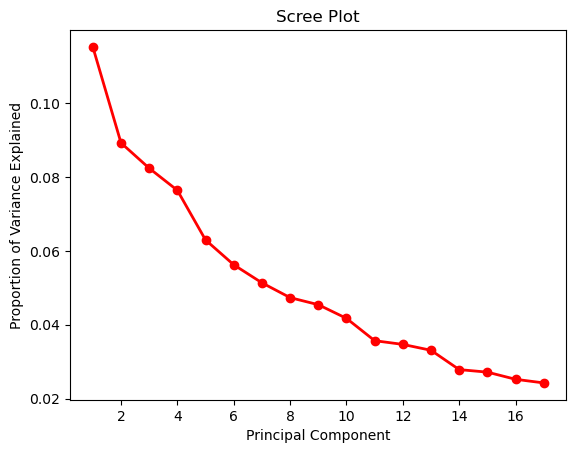

In [11]:
min_max_scaler = MinMaxScaler()

pca_norm = PCA(n_components=17, random_state=0)
X_train_normalized = pca_norm.fit_transform(min_max_scaler.fit_transform(X_train))
print('17 PCs explain ', np.cumsum(pca_norm.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_norm.n_components_) + 1
plt.plot(PC_values, pca_norm.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_normalized = pca_norm.transform(min_max_scaler.transform(X_test))

X_normalized = pca_norm.transform(min_max_scaler.fit_transform(X))

Full datasets

In [12]:
X_train = X_train_pca
X_test = pca.transform(X_test)
X = pca.transform(X)

# Hyperparameter tuning using GridSearchCV

In [13]:
def tune_hyperparameters(model,X,y):
  param_grid = {
      'C' : [0.1,1,10,100,1000],
      'kernel' : ['linear','rbf']
  }

  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

### With Standardization

In [14]:
best_parameters_std = tune_hyperparameters(SVC(random_state=0),X_train_standardized,y_train)

Best Params:  {'C': 0.1, 'kernel': 'linear'}


### With Normalization

In [15]:
best_parameters_norm = tune_hyperparameters(SVC(random_state=0),X_train_normalized,y_train)

Best Params:  {'C': 0.1, 'kernel': 'linear'}


# SVC

In [16]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

### Without Scaling

Accuracy:  0.5594405594405595
Precision:  0.5833333333333334
Recall:  0.56
F1 Score:  0.5714285714285714
Confusion Matrix:
 [[38 30]
 [33 42]]


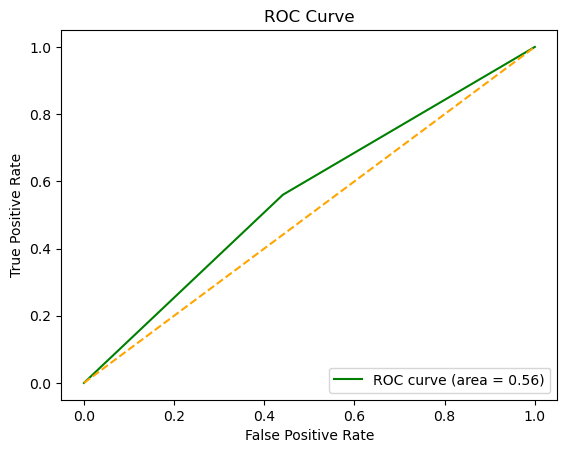

In [17]:
train_predict_evaluate(SVC(random_state=0),X_train,y_train,X_test)

### With Standardization

Accuracy:  0.6713286713286714
Precision:  0.6842105263157895
Recall:  0.6933333333333334
F1 Score:  0.6887417218543047
Confusion Matrix:
 [[44 24]
 [23 52]]


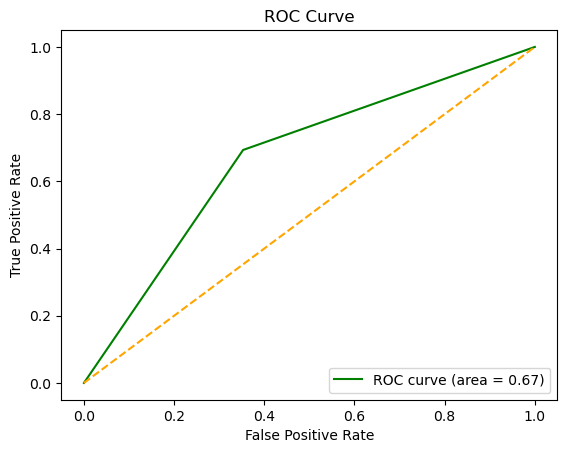

In [18]:
train_predict_evaluate(SVC(random_state=0,**best_parameters_std),X_train_standardized,y_train,X_test_standardized)

### With Normalization

Accuracy:  0.7272727272727273
Precision:  0.7432432432432432
Recall:  0.7333333333333333
F1 Score:  0.738255033557047
Confusion Matrix:
 [[49 19]
 [20 55]]


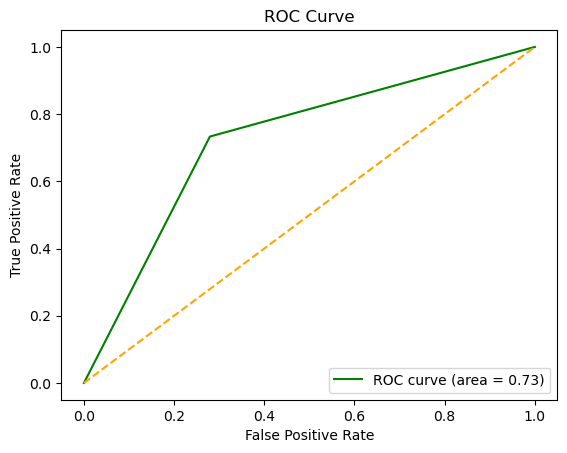

In [19]:
train_predict_evaluate(SVC(random_state=0,**best_parameters_norm),X_train_normalized,y_train,X_test_normalized)

# K-Fold Cross Validation

In [20]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [21]:
metrics = []

### Without Scaling

In [22]:
metrics.append(cross_validation(SVC(random_state=0),X,y))

Accuracy:  0.5780739081746921
Precision:  0.5651069604629976
Recall:  0.7007978723404256
F1 Score:  0.6228231898820134


### With Standardization

In [23]:
metrics.append(cross_validation(SVC(random_state=0,**best_parameters_std),X_standardized,y))

Accuracy:  0.7193057110862261
Precision:  0.7294445788855727
Recall:  0.6964539007092199
F1 Score:  0.7119756587498522


In [24]:
metrics.append(cross_validation(SVC(random_state=0,**best_parameters_norm),X_normalized,y))

Accuracy:  0.683404255319149
Precision:  0.6904539447601428
Recall:  0.6713652482269503
F1 Score:  0.6780640698756125


# Performance and Comparison Plots

In [25]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.578074,0.565107,0.700798,0.622823
With Standardization,0.719306,0.729445,0.696454,0.711976
With Normalization,0.683404,0.690454,0.671365,0.678064


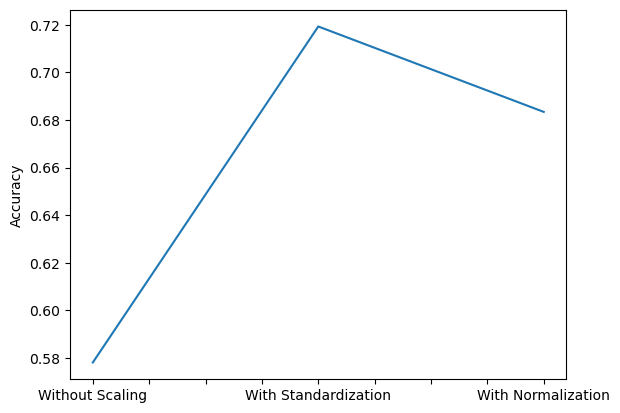

In [26]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

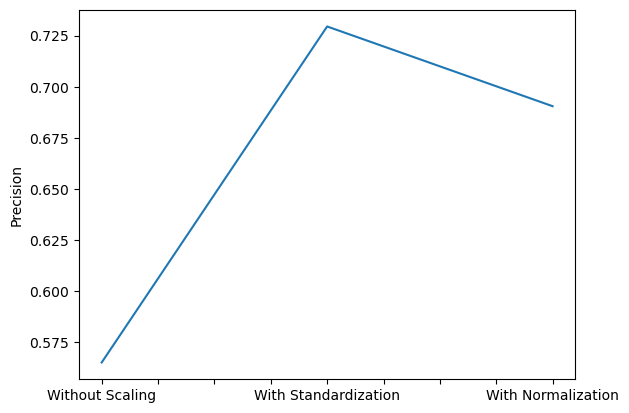

In [27]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()

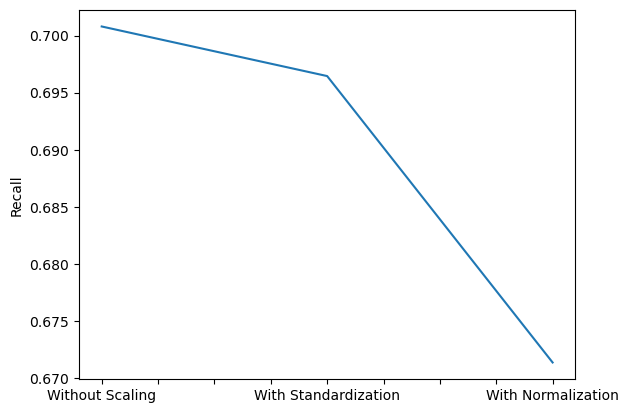

In [28]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()

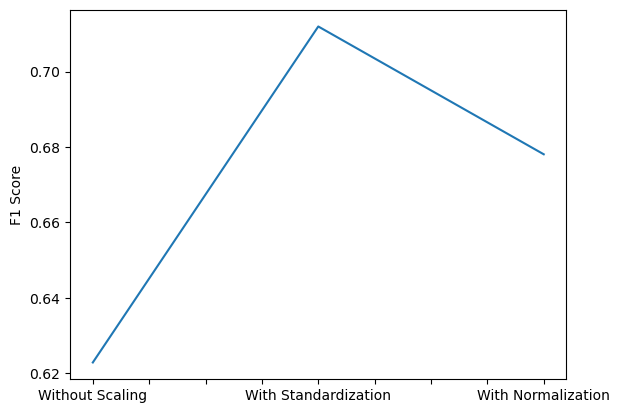

In [29]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()

# Oversampling


In [30]:
X=X2
y=Y2

# Spliting into Train and Test Sets

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Feature Scaling

####PCA

20 PCs explain  [72.0048171  99.77248109] % of variance cumulatively


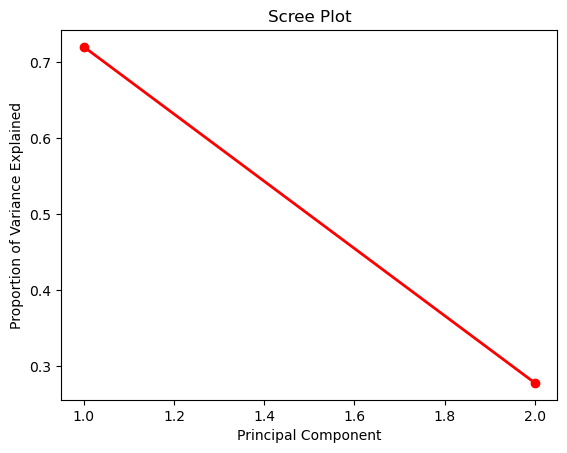

In [32]:
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
print('20 PCs explain ', np.cumsum(pca.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

Standardization

20 PCs explain  [16.64465197 23.58747178 29.84784841 35.39372339 40.35079016 44.67005664
 48.56277173 52.35230055 56.02047014 59.61604873 63.08993843 66.47912883
 69.75557924 72.92265112 75.95912735 78.92913152 81.82658034 84.6202276
 87.25717622 89.81093824] % of variance cumulatively


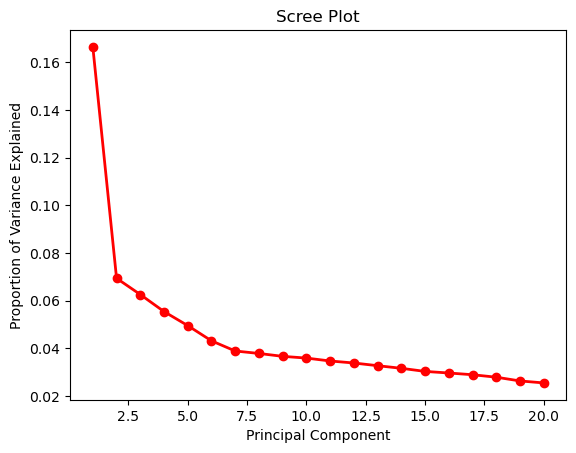

In [33]:
standard_scaler = StandardScaler()

pca_std = PCA(n_components=20, random_state=0)
X_train_standardized = pca_std.fit_transform(standard_scaler.fit_transform(X_train))
print('20 PCs explain ', np.cumsum(pca_std.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_std.n_components_) + 1
plt.plot(PC_values, pca_std.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_standardized = pca_std.transform(standard_scaler.transform(X_test))

X_standardized = pca_std.transform(standard_scaler.fit_transform(X))

Normalization

17 PCs explain  [ 9.99039652 19.50265107 27.87547577 34.91437668 41.54863366 47.16013872
 52.37699663 57.42392261 61.95387303 65.91516331 69.62470578 73.16976549
 76.20145628 79.04762956 81.82726103 84.41792803 86.85682217] % of variance cumulatively


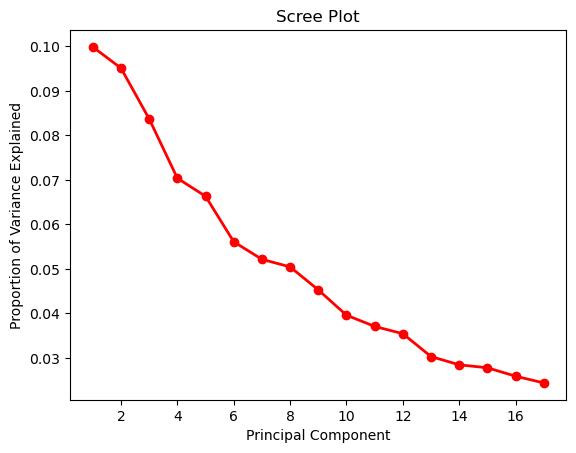

In [34]:
min_max_scaler = MinMaxScaler()

pca_norm = PCA(n_components=17, random_state=0)
X_train_normalized = pca_norm.fit_transform(min_max_scaler.fit_transform(X_train))
print('17 PCs explain ', np.cumsum(pca_norm.explained_variance_ratio_)*100, '% of variance cumulatively')
# scree plot
PC_values = np.arange(pca_norm.n_components_) + 1
plt.plot(PC_values, pca_norm.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()
X_test_normalized = pca_norm.transform(min_max_scaler.transform(X_test))

X_normalized = pca_norm.transform(min_max_scaler.fit_transform(X))

Full datasets

In [35]:
X_train = X_train_pca
X_test = pca.transform(X_test)
X = pca.transform(X)

# Hyperparameter tuning using GridSearchCV

In [36]:
def tune_hyperparameters(model,X,y):
  param_grid = {
      'C' : [0.1,1,10,100,1000],
      'kernel' : ['linear','rbf']
  }

  grid_search = GridSearchCV(model,param_grid=param_grid)
  grid_search.fit(X,y)
  print("Best Params: ",grid_search.best_params_)
  return grid_search.best_params_

### With Standardization

In [37]:
best_parameters_std = tune_hyperparameters(SVC(random_state=0),X_train_standardized,y_train)

Best Params:  {'C': 10, 'kernel': 'rbf'}


### With Normalization

In [38]:
best_parameters_norm = tune_hyperparameters(SVC(random_state=0),X_train_normalized,y_train)

Best Params:  {'C': 100, 'kernel': 'rbf'}


# SVC

In [39]:
def train_predict_evaluate(model,X_train,y_train,X_test):
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)

  print("Accuracy: ",accuracy_score(y_test,y_pred))
  print("Precision: ",precision_score(y_test,y_pred))
  print("Recall: ",recall_score(y_test,y_pred))
  print("F1 Score: ",f1_score(y_test,y_pred))
  print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))

  
  fpr,tpr,thresholds = roc_curve(y_test,y_pred)
  plt.plot(fpr, tpr,color='green',label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
  plt.plot([0, 1], [0, 1], color='orange', linestyle='--')
  plt.xlabel("False Positive Rate")
  plt.ylabel("True Positive Rate")
  plt.title("ROC Curve")
  plt.legend(loc="lower right")
  plt.show()

### Without Scaling

Accuracy:  0.6378378378378379
Precision:  0.6810344827586207
Recall:  0.6015228426395939
F1 Score:  0.6388140161725067
Confusion Matrix:
 [[235 111]
 [157 237]]


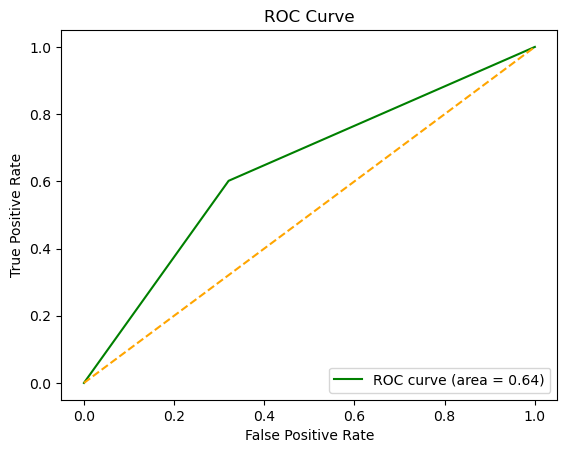

In [40]:
train_predict_evaluate(SVC(random_state=0),X_train,y_train,X_test)

### With Standardization

Accuracy:  0.9581081081081081
Precision:  0.9290780141843972
Recall:  0.9974619289340102
F1 Score:  0.9620563035495716
Confusion Matrix:
 [[316  30]
 [  1 393]]


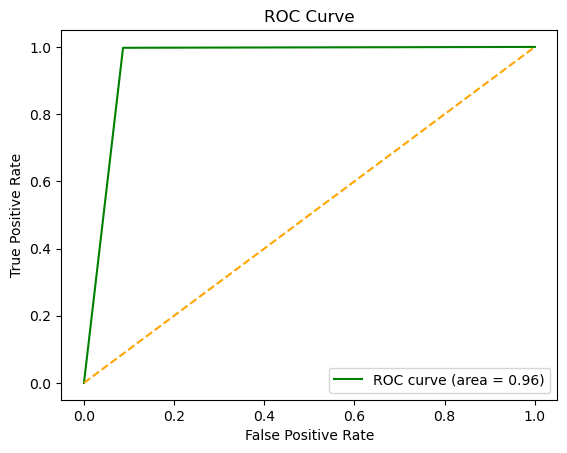

In [41]:
train_predict_evaluate(SVC(random_state=0,**best_parameters_std),X_train_standardized,y_train,X_test_standardized)

### With Normalization

Accuracy:  0.9405405405405406
Precision:  0.9146919431279621
Recall:  0.9796954314720813
F1 Score:  0.946078431372549
Confusion Matrix:
 [[310  36]
 [  8 386]]


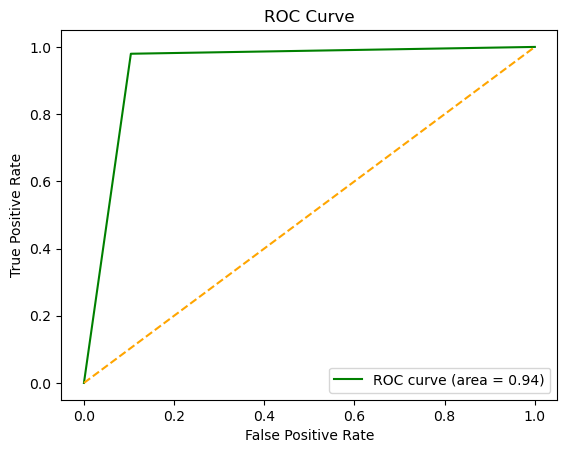

In [42]:
train_predict_evaluate(SVC(random_state=0,**best_parameters_norm),X_train_normalized,y_train,X_test_normalized)

# K-Fold Cross Validation

In [43]:
def cross_validation(model,X,y):
  scores = cross_validate(model, X, y, cv=5,scoring=('accuracy','precision','recall','f1'))

  metrics = []
  metrics.append(np.mean(scores['test_accuracy']))
  metrics.append(np.mean(scores['test_precision']))
  metrics.append(np.mean(scores['test_recall']))
  metrics.append(np.mean(scores['test_f1']))

  print("Accuracy: ",metrics[0])
  print("Precision: ",metrics[1])
  print("Recall: ",metrics[2])
  print("F1 Score: ",metrics[3])

  return metrics

In [44]:
metrics = []

### Without Scaling

In [45]:
metrics.append(cross_validation(SVC(random_state=0),X,y))

Accuracy:  0.6330218196450714
Precision:  0.6473506048294708
Recall:  0.5855929692900168
F1 Score:  0.6141934222710959


### With Standardization

In [46]:
metrics.append(cross_validation(SVC(random_state=0,**best_parameters_std),X_standardized,y))

Accuracy:  0.9485000533788833
Precision:  0.9127835557142483
Recall:  0.991889667884533
F1 Score:  0.95063920826413


In [47]:
metrics.append(cross_validation(SVC(random_state=0,**best_parameters_norm),X_normalized,y))

Accuracy:  0.9509357728851697
Precision:  0.9127197221361876
Recall:  0.9975708502024292
F1 Score:  0.9531857009057656


# Performance and Comparison Plots

In [48]:
mdf = pd.DataFrame(metrics,columns=["Accuracy","Precision","Recall","F1 Score"],index=["Without Scaling","With Standardization","With Normalization"])
mdf.head()

,Accuracy,Precision,Recall,F1 Score
Without Scaling,0.633022,0.647351,0.585593,0.614193
With Standardization,0.948500,0.912784,0.991890,0.950639
With Normalization,0.950936,0.912720,0.997571,0.953186


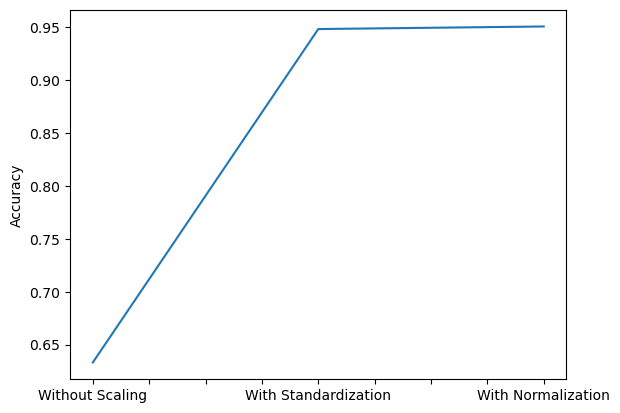

In [49]:
mdf['Accuracy'].plot()
plt.ylabel("Accuracy")
plt.show()

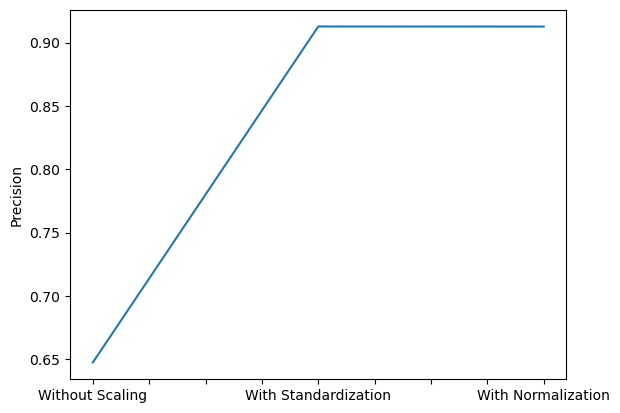

In [50]:
mdf['Precision'].plot()
plt.ylabel("Precision")
plt.show()

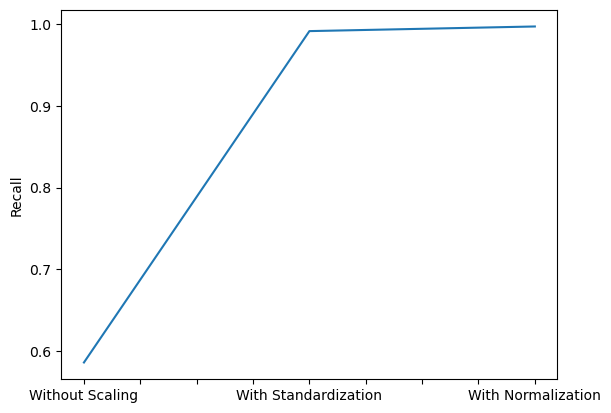

In [51]:
mdf['Recall'].plot()
plt.ylabel("Recall")
plt.show()

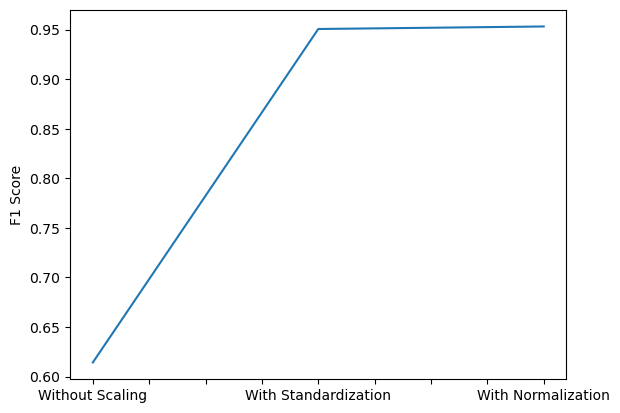

In [52]:
mdf['F1 Score'].plot()
plt.ylabel("F1 Score")
plt.show()